data opened


Testing window size 5
score trained: 0.448548812665
score 1: 0.0
score 2: 0.0
score 3: 0.00263852242744
score 4: 0.0211081794195
score 5: 0.0448548812665
score 6: 0.308707124011
score 7: 0.540897097625
score 8: 0.0765171503958
score 9: 0.00527704485488
score 10: 0.0


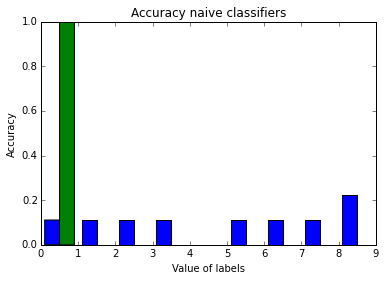

In [3]:
import data_aggregator as dr
from scipy.optimize import brute
import statsmodels.api as sm
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import cross_validation
import  sklearn.metrics as metrics

def testDecisionTree(window_size, data_aggregator):
    data, target, participants, variables, datatime = data_aggregator.read()
    print "\n\nTesting window size", window_size
    for _ in range(1):
        data_train, data_test, target_train, target_test = cross_validation.train_test_split(data, target,
                                                                                             test_size=0.3)

        clf = DecisionTreeClassifier()
        clf = clf.fit(data_train, target_train)

        data_score = clf.score(data_test, target_test)
        print "score trained:", data_score
    
    data_score1 = clf.score(data_test, [1] * len(target_test))
    print "score 1:", data_score1
    data_score2 = clf.score(data_test, [2] * len(target_test))
    print "score 2:", data_score2
    data_score3 = clf.score(data_test, [3] * len(target_test))
    print "score 3:", data_score3
    data_score4 = clf.score(data_test, [4] * len(target_test))
    print "score 4:", data_score4
    data_score5 = clf.score(data_test, [5] * len(target_test))
    print "score 5:", data_score5
    data_score6 = clf.score(data_test, [6] * len(target_test))
    print "score 6:", data_score6
    data_score7 = clf.score(data_test, [7] * len(target_test))
    print "score 7:", data_score7
    data_score8 = clf.score(data_test, [8] * len(target_test))
    print "score 8:", data_score8
    data_score9 = clf.score(data_test, [9] * len(target_test))
    print "score 9:", data_score9
    data_score10 = clf.score(data_test, [10] * len(target_test))
    print "score 10:", data_score10
    datascorelist = np.array([[0,data_score1], [1,data_score2], [2,data_score3], [3,data_score4], [5,data_score5], 
                              [6,data_score6], [7,data_score7], [8,data_score8], [9,data_score9], [10,data_score10]])
    range_datascores = range(len(datascorelist))
    
    plt.hist(datascorelist, bins = range_datascores, normed = True)
    plt.title("Accuracy naive classifiers")
    plt.xlabel("Value of labels")
    plt.ylabel("Accuracy")
    plt.show()
    


def testARIMA(data_aggregator):
    data = data_aggregator.read(method='all')
    arma_mod20 = sm.tsa.ARMA(data, (2, 0), freq='D').fit()
    print arma_mod20
    start = '2014-03-30'
    end = '2014-05-04'
    predict_moods = arma_mod20.predict(start, end, dynamic=True)
    real_moods = data[start:end]
    print predict_moods.round(0)
    print real_moods.round(0)
    print metrics.mean_squared_error(real_moods, predict_moods)
    print metrics.accuracy_score(real_moods.round(0), predict_moods.round(0))



filepath = 'data/dataset_mood_smartphone.csv'
#filepath = 'data/dataset_small.csv'

data_aggregator = dr.DataAggregator(filepath)
testDecisionTree(5, data_aggregator)


#data, target, participants, variables, datatime = data_aggregator.read()
#number_windows = range(len(target))

def get_feature(feature, participant, datatime, count):
    dates = []
    data = []
    for datum in datatime:
        if datum[1] == participant:
            dates.append(datum[0])
            data.append(datum[2][count])
    tf = pd.DataFrame(data = np.array(data),index = np.array(dates))
    print tf
            
    
    return tf

# plot time series of feature
def plot_series(feature, participant, datatime, count):
    print 'Plotting ' + feature
    if participant == '':
        print empty
    else:
        feature_indiv = get_feature(feature, participant, datatime, count)
    ax = feature_indiv.plot(use_index=True)
    if feature == 'mood':
        ax.set_ylim((0,10))
    ax.set_xlim((min(feature_indiv.index),max(feature_indiv.index)))
    fig = ax.get_figure()
    plt.show()
    #plt.close(fig)
    
  
# for participant in participants:
#     count = 0  
#     for feature in variables:
#         print feature
#         plot_series(feature, participant, datatime, count)
#         count += 1
#         break

#testARIMA(data_aggregator)